# Laptop Price Prediction Using Machine Learning

## Problem Statement

We will make a project for Laptop price prediction. If any user wants
to buy a laptop then our application should be compatible to provide a
tentative price of the Laptop according to the user configurations.

## Import the required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Understanding the Dataset

In [3]:
# check the shape of the dataset
df.shape

(1303, 12)

The dataset contains 1,303 rows and 12 columns

In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# check for duplicate
df.duplicated().sum()

0

The dataset does not contain any duplicate

## Data Cleaning

In [6]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Drop the Unamed Column

In [7]:
# drop the unamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

#### Company Column

In [9]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

#### TypeName

In [10]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

#### Inches

In [11]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [12]:
df['Inches'].dtype

dtype('float64')

#### Ram

In [13]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [14]:
# replace the 'GB' with ''
df['Ram'] = df['Ram'].str.replace('GB', '')

In [15]:
df['Ram'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

In [16]:
# convert the ram datatype to int
df['Ram'] = df['Ram'].astype("int32")

In [17]:
df['Ram'].dtype

dtype('int32')

#### Weight

In [18]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [19]:
# replace the 'kg' with ''
df['Weight'] = df['Weight'].str.replace('kg','')

In [20]:
df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [21]:
df['Weight'] = df['Weight'].astype("float32")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

#### Univariate Analysis: 

#### Price Distribution

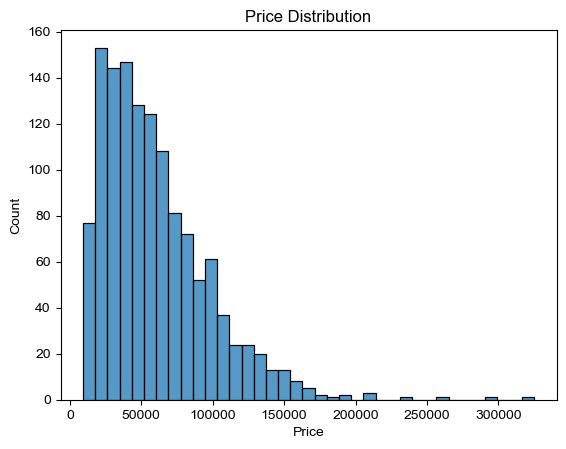

In [23]:
sns.histplot(df['Price'], kde_kws={'color':'purple', 
                                   'edgecolor':'black',
                                  'linewidth':0.5,
                                  'linestyle':'--'})
sns.set_style('darkgrid')
plt.title("Price Distribution")
plt.show()

#### Inches Distribution

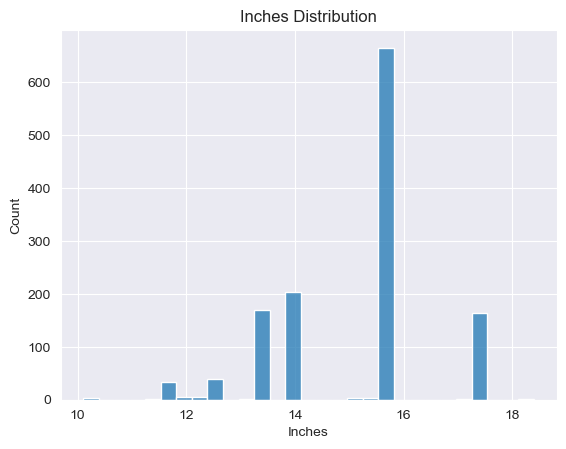

In [24]:
sns.histplot(df['Inches'], kde_kws={'color':'purple', 
                                   'edgecolor':'black',
                                  'linewidth':0.5,
                                  'linestyle':'--'})
sns.set_style('darkgrid')
plt.title("Inches Distribution")
plt.show()

#### Ram Distribution

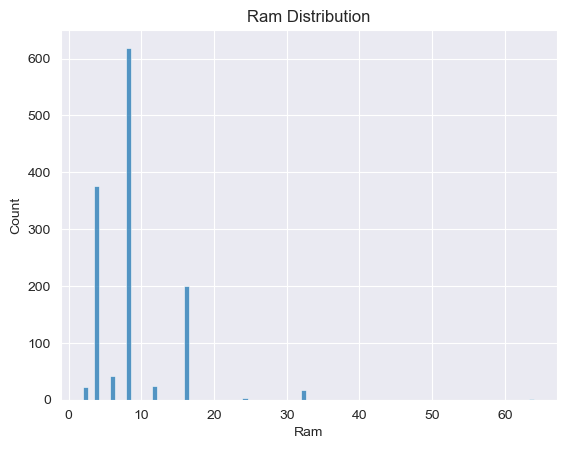

In [25]:
sns.histplot(df['Ram'], kde_kws={'color':'purple', 
                                   'edgecolor':'black',
                                  'linewidth':0.5,
                                  'linestyle':'--'})
sns.set_style('darkgrid')
plt.title("Ram Distribution")
plt.show()

#### Bivariate Analysis: 

#### 1. Count of Laptop by Company

In [26]:
count_by_company = df.groupby('Company')['TypeName'].count().reset_index().rename(columns={'TypeName':'Count'}).sort_values('Count', ascending=False)

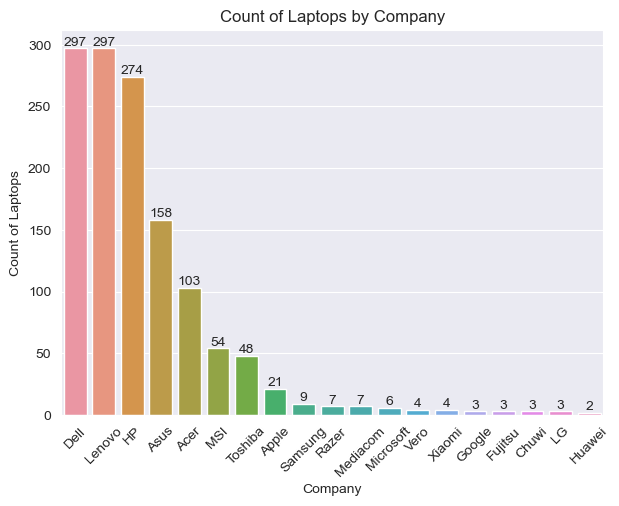

In [27]:
plt.figure(figsize=(7,5))

ax = sns.barplot(data=count_by_company, x='Company', y='Count')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Count of Laptops by Company")
plt.xlabel("Company")
plt.ylabel("Count of Laptops")
plt.xticks(rotation=45)
plt.show()

#### 2. Average Price of Laptop by Company

In [28]:
price_by_company = df.groupby('Company')['Price'].mean().reset_index().rename(columns={'Price':'Avg Price'}).sort_values('Avg Price', ascending=False)

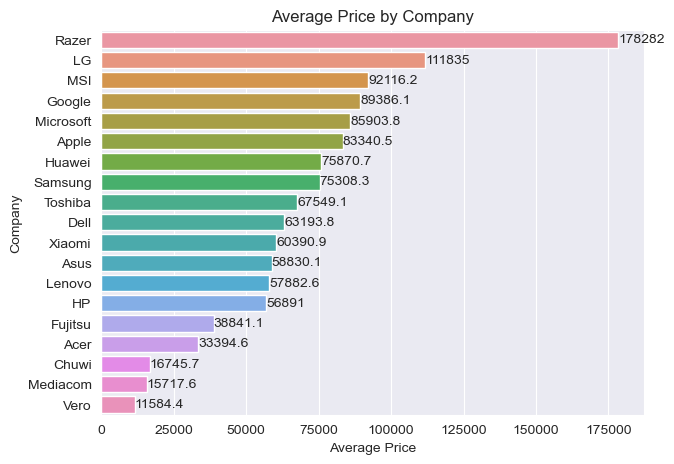

In [29]:
plt.figure(figsize=(7,5))

ax = sns.barplot(data=price_by_company, y='Company', x='Avg Price')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Average Price by Company")
plt.ylabel("Company")
plt.xlabel("Average Price")
plt.show()

#### 3. Count of Laptop by TypeName

In [30]:
count_by_typename = df.groupby('TypeName')['Company'].count().reset_index().rename(columns={'Company':'Count'}).sort_values('Count', ascending=False)

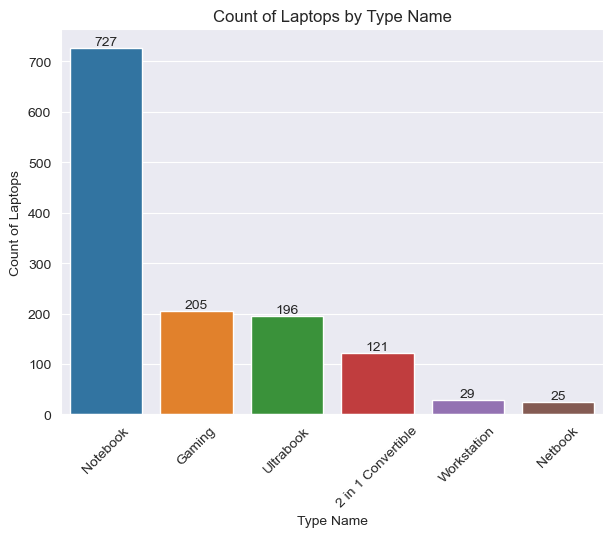

In [31]:
plt.figure(figsize=(7,5))

ax = sns.barplot(data=count_by_typename, x='TypeName', y='Count')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Count of Laptops by Type Name")
plt.xlabel("Type Name")
plt.ylabel("Count of Laptops")
plt.xticks(rotation=45)
plt.show()

#### 4. Average Price by Type Name

In [32]:
price_by_typename = df.groupby('TypeName')['Price'].mean().reset_index().rename(columns={'Price':'Avg Price'}).sort_values('Avg Price', ascending=False)

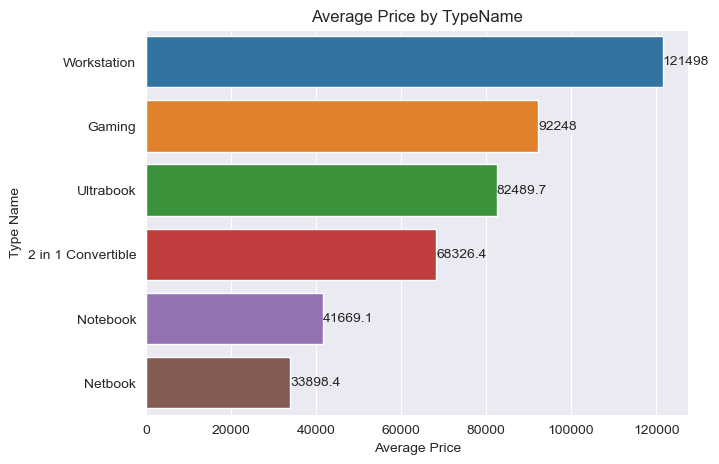

In [33]:
plt.figure(figsize=(7,5))

ax = sns.barplot(data=price_by_typename, y='TypeName', x='Avg Price')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Average Price by TypeName")
plt.ylabel("Type Name")
plt.xlabel("Average Price")
plt.show()

#### Relationship between Inches and Price

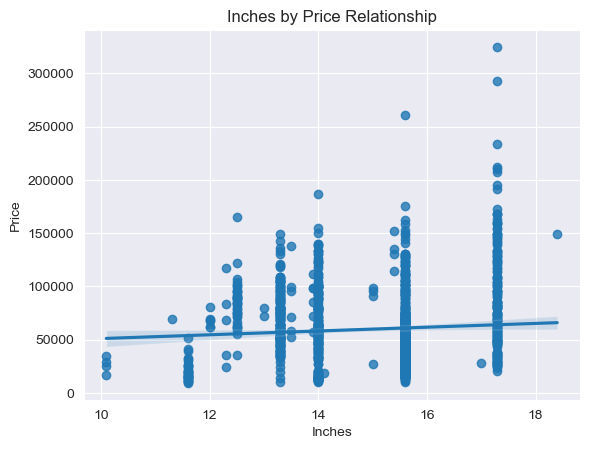

In [34]:
sns.regplot(data=df, x='Inches', y='Price')
sns.set_style('darkgrid')
plt.title("Inches by Price Relationship")
plt.show()

#### Relationship between  Ram and Price

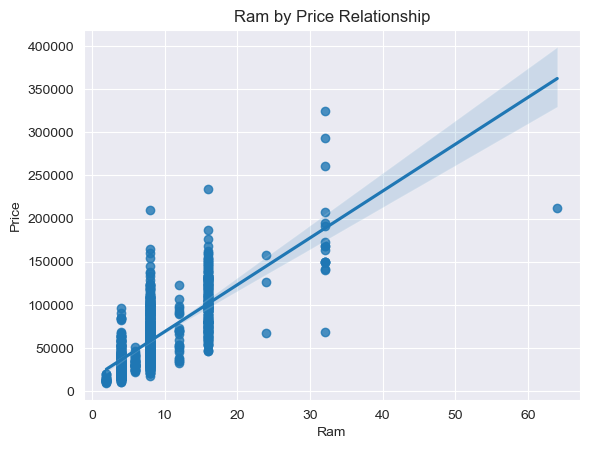

In [35]:
sns.regplot(data=df, x='Ram', y='Price')
sns.set_style('darkgrid')
plt.title("Ram by Price Relationship")
plt.show()

In [36]:
df.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Name: Price, dtype: float64

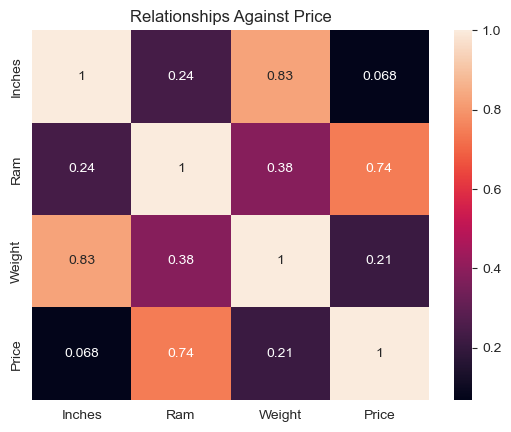

In [37]:
sns.heatmap(data = df.corr(), annot=True)
plt.title("Relationships Against Price")
plt.show()

## Feature Engineering

In [38]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [39]:
def check_touch(x):
    if 'Touchscreen' in x:
        return 1
    else:
        return 0

In [40]:
# create a new column to hold whether a laptop is Touch or not

df['TouchScreen'] = df['ScreenResolution'].apply(check_touch)

In [41]:
def check_ips(x):
    if 'IPS' in x:
        return 1
    else:
        return 0

In [42]:
# create a new column to hold whether a laptop is IPS or not

df['Ips'] = df['ScreenResolution'].apply(check_ips)

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [44]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [45]:
res_split = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [46]:
df['X_res'] = res_split[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['Y_res'] = res_split[1]

In [47]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [49]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


#### Calulate PPI : Pixel per Inches

In [51]:
df['PPI'] = ((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

In [52]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [53]:
# now, delete unwanted column
df.drop(columns={'ScreenResolution','X_res','Y_res'}, inplace=True)

In [54]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### CPU

In [55]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [56]:
df['CpuName'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [57]:
df['CpuName'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [58]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == 'Intel Core i3':
        return text
    else:
        if text.split(' ')[0] == 'Intel':
            return "Other Intel Processor"
        else:
            return "Others"

In [59]:
df['CpuBrand'] = df['CpuName'].apply(fetch_processor)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  TouchScreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  PPI          1303 non-null   float64
 13  CpuName      1303 non-null   object 
 14  CpuBrand     1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(8)
memory usage: 142.6+ KB


In [61]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CpuName,CpuBrand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [62]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [63]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [64]:
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [65]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

In [66]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CpuName,CpuBrand,first,second
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,256 SSD,None


In [67]:
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [68]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: first, dtype: int64

In [69]:
def checkSDD(x):
    if "SSD" in x:
        return 1
    else:
        return 0
    
def checkHDD(x):
    if "HDD" in x:
        return 2
    else:
        return 0

In [70]:
df['first'].apply(checkSDD)

0       1
1       0
2       1
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: first, Length: 1303, dtype: int64

In [71]:
df["first"].apply(lambda x: 1 if "HDD" in x else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    1
1302    1
Name: first, Length: 1303, dtype: int64

In [72]:

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [73]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Ips,PPI,CpuName,CpuBrand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,226.983005,Intel Core i5,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,141.211998,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,220.534624,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,226.983005,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0


In [74]:
df['first'] = df['first'].str.split(' ').apply(lambda x:x[0])

In [75]:
df['second'].fillna("0", inplace=True)

In [76]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [77]:
df['second'].value_counts()

0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: second, dtype: int64

In [78]:
df['second'] = df['second'].str.strip()

In [79]:
df['second'] = df['second'].str.split(' ').apply(lambda x:x[0])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Inches               1303 non-null   float64
 3   Cpu                  1303 non-null   object 
 4   Ram                  1303 non-null   int32  
 5   Memory               1303 non-null   object 
 6   Gpu                  1303 non-null   object 
 7   OpSys                1303 non-null   object 
 8   Weight               1303 non-null   float32
 9   Price                1303 non-null   float64
 10  TouchScreen          1303 non-null   int64  
 11  Ips                  1303 non-null   int64  
 12  PPI                  1303 non-null   float64
 13  CpuName              1303 non-null   object 
 14  CpuBrand             1303 non-null   object 
 15  first                1303 non-null   o

In [81]:
df['first'] = df['first'].astype('int32')
df['second'] = df['second'].astype('int32')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Inches               1303 non-null   float64
 3   Cpu                  1303 non-null   object 
 4   Ram                  1303 non-null   int32  
 5   Memory               1303 non-null   object 
 6   Gpu                  1303 non-null   object 
 7   OpSys                1303 non-null   object 
 8   Weight               1303 non-null   float32
 9   Price                1303 non-null   float64
 10  TouchScreen          1303 non-null   int64  
 11  Ips                  1303 non-null   int64  
 12  PPI                  1303 non-null   float64
 13  CpuName              1303 non-null   object 
 14  CpuBrand             1303 non-null   object 
 15  first                1303 non-null   i

In [83]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
384,Asus,Ultrabook,13.3,Intel Core i7 7500U 2.7GHz,16,512 SSD,Intel HD Graphics 620,Windows 10,1.10,93181.392,...,512,0,0,1,0,0,0,0,0,0
938,Dell,Ultrabook,14.0,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,87325.920,...,256,0,0,1,0,0,0,0,0,0
489,Asus,Ultrabook,12.5,Intel Core i7 7500U 2.7GHz,16,512 SSD,Intel HD Graphics 620,Windows 10,0.91,103896.000,...,512,0,0,1,0,0,0,0,0,0
881,HP,2 in 1 Convertible,15.6,Intel Core i5 7200U 2.5GHz,4,500 HDD,Intel HD Graphics 620,Windows 10,2.30,36486.144,...,500,0,1,0,0,0,0,0,0,0
339,Dell,Notebook,15.6,Intel Core i5 8250U 1.6GHz,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.00,60885.720,...,256,0,0,1,0,0,0,0,0,0


In [84]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [85]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
494,Asus,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,24,256 SSD + 1000 HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,67612.3200,...,0,0,1,0,0,0,1000,256,0,0
1031,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,6,1000 HDD,AMD Radeon R5,Windows 10,2.10,21791.5200,...,0,0,0,0,0,0,1000,0,0,0
535,Dell,Notebook,15.6,Intel Core i7 7600U 2.8GHz,8,256 SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.3200,...,0,0,0,0,0,0,0,256,0,0
156,Lenovo,2 in 1 Convertible,14.0,Intel Core i3 7100U 2.4GHz,4,256 SSD,Intel HD Graphics 620,Windows 10,1.74,33513.1200,...,0,0,0,0,0,0,0,256,0,0
195,HP,Notebook,17.3,Intel Core i5 8250U 1.6GHz,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,...,0,0,0,0,0,0,1000,0,0,0
608,Lenovo,2 in 1 Convertible,15.6,Intel Core i7 7700HQ 2.8GHz,8,256 SSD,Intel HD Graphics 630,Windows 10,2.00,69210.7200,...,0,0,0,0,0,0,0,256,0,0
166,Acer,Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.10,19367.8128,...,0,0,0,0,0,0,1000,0,0,0
55,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256 SSD,AMD Radeon 520,Windows 10,2.13,40908.3840,...,0,0,0,0,0,0,0,256,0,0
453,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.65,71661.6000,...,0,0,0,0,0,0,0,256,0,0
928,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.18,37725.4368,...,0,0,0,0,0,0,1000,0,0,0


In [86]:

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Cpu            1303 non-null   object 
 4   Ram            1303 non-null   int32  
 5   Memory         1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float32
 9   Price          1303 non-null   float64
 10  TouchScreen    1303 non-null   int64  
 11  Ips            1303 non-null   int64  
 12  PPI            1303 non-null   float64
 13  CpuName        1303 non-null   object 
 14  CpuBrand       1303 non-null   object 
 15  HDD            1303 non-null   int64  
 16  SSD            1303 non-null   int64  
 17  Hybrid         1303 non-null   int64  
 18  Flash_St

In [88]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CpuName,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [89]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [90]:
df['GpuBrand'] = df['Gpu'].str.split(' ').apply(lambda x:x[0])

In [91]:
df['GpuBrand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GpuBrand, dtype: int64

In [92]:
# delete the record with ARM GPU
df = df[df['GpuBrand'] != 'ARM']

In [93]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [94]:
#OPs extrating function

def category_os(row):
    if row == 'Windows 10' or row == 'Windows 7' or row == 'Windows 10 S':
        return 'Windows'
    elif row == 'macOS' or row == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [95]:
df['OS'] = df['OpSys'].apply(category_os)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_19846/2871264862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(category_os)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Cpu            1302 non-null   object 
 4   Ram            1302 non-null   int32  
 5   Memory         1302 non-null   object 
 6   Gpu            1302 non-null   object 
 7   OpSys          1302 non-null   object 
 8   Weight         1302 non-null   float32
 9   Price          1302 non-null   float64
 10  TouchScreen    1302 non-null   int64  
 11  Ips            1302 non-null   int64  
 12  PPI            1302 non-null   float64
 13  CpuName        1302 non-null   object 
 14  CpuBrand       1302 non-null   object 
 15  HDD            1302 non-null   int64  
 16  SSD            1302 non-null   int64  
 17  Hybrid         1302 non-null   int64  
 18  Flash_St

In [97]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Ips,PPI,CpuName,CpuBrand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand,OS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Cpu            1302 non-null   object 
 4   Ram            1302 non-null   int32  
 5   Memory         1302 non-null   object 
 6   Gpu            1302 non-null   object 
 7   OpSys          1302 non-null   object 
 8   Weight         1302 non-null   float32
 9   Price          1302 non-null   float64
 10  TouchScreen    1302 non-null   int64  
 11  Ips            1302 non-null   int64  
 12  PPI            1302 non-null   float64
 13  CpuName        1302 non-null   object 
 14  CpuBrand       1302 non-null   object 
 15  HDD            1302 non-null   int64  
 16  SSD            1302 non-null   int64  
 17  Hybrid         1302 non-null   int64  
 18  Flash_St

 ## More EDA

In [99]:
df['CpuBrand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
Others                    62
Name: CpuBrand, dtype: int64

#### 1. Count of Laptop by Cpu Brand

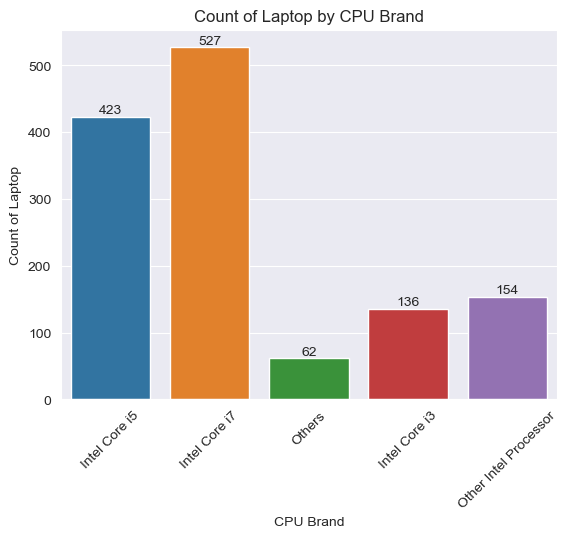

In [100]:
ax = sns.countplot(data=df, x='CpuBrand')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Count of Laptop by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Count of Laptop")
plt.xticks(rotation=45)
plt.show()

#### 2. Average Price by Cpu Brand

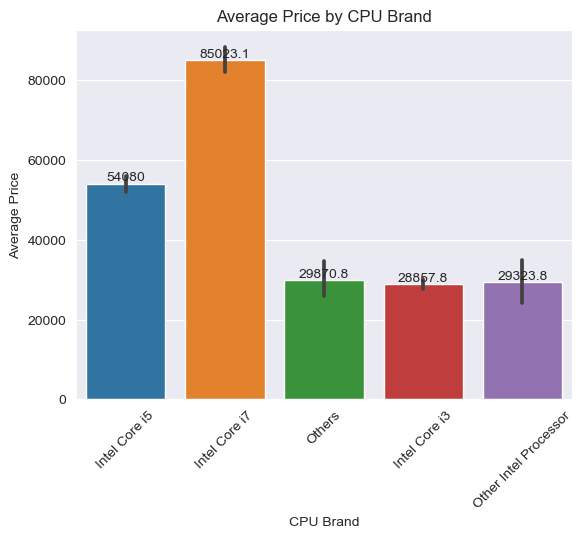

In [101]:
ax = sns.barplot(data=df, x='CpuBrand', y='Price')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Average Price by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

#### 3. Count of Laptop by OS

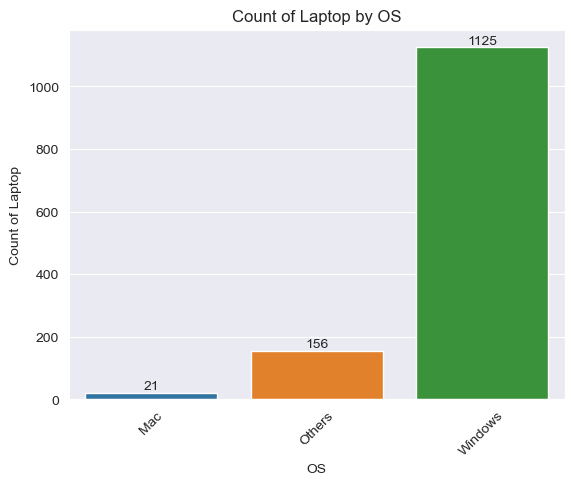

In [102]:
ax = sns.countplot(data=df, x='OS')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Count of Laptop by OS")
plt.xlabel("OS")
plt.ylabel("Count of Laptop")
plt.xticks(rotation=45)
plt.show()

#### Average Price by OS

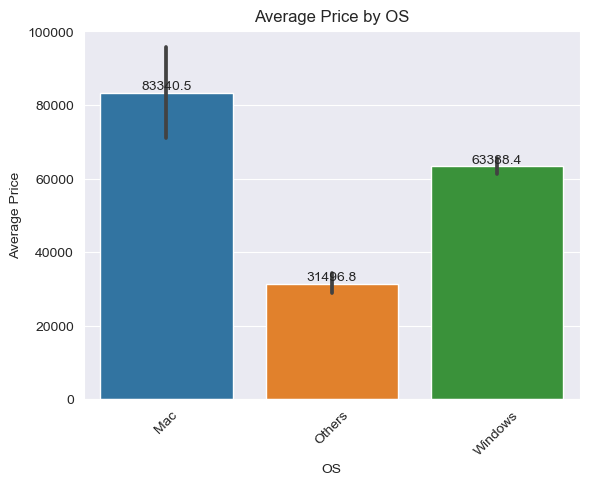

In [103]:
ax = sns.barplot(data=df, x='OS', y='Price')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("Average Price by OS")
plt.xlabel("OS")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

In [104]:
df.corr()['Price']

Inches           0.067329
Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
Ips              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

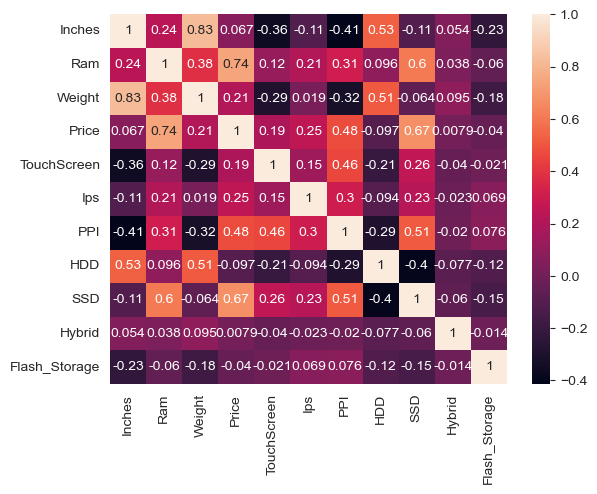

In [105]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [106]:
df.drop(columns=['Memory','Hybrid', 'Flash_Storage'], inplace=True)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_19846/4288430078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory','Hybrid', 'Flash_Storage'], inplace=True)


In [107]:
df.drop(columns=['Inches', 'Cpu', 'Gpu', 'OpSys', 'CpuName'], inplace=True)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_19846/436280808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Inches', 'Cpu', 'Gpu', 'OpSys', 'CpuName'], inplace=True)


In [108]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'PPI', 'CpuBrand', 'HDD', 'SSD', 'GpuBrand', 'OS'],
      dtype='object')

### Removing Outliers

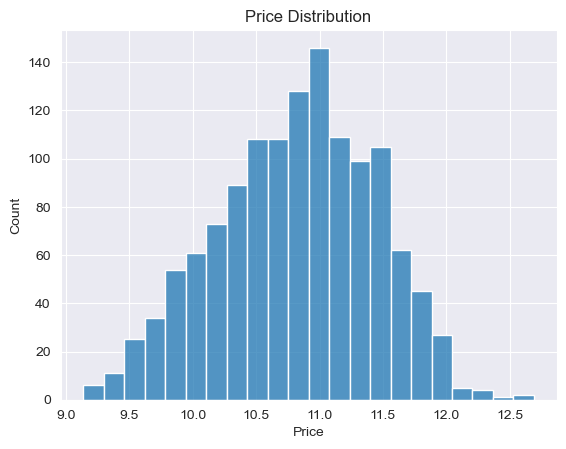

In [109]:
sns.histplot(np.log(df['Price']))
plt.title("Price Distribution")
plt.show()

## Building Machine Learning Model

In [110]:
#Import all ML algoritham 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [111]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


## Spliting Data

In [112]:
#Divide the data for x and y
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

## Train Test Split

In [113]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

# Linear Regression

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 80.73%
MAE : 21.02%
MSE : 7.37%
Cross Val Accuracy: 81.79 %


NameError: name 'model_comparison' is not defined

# KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

## Exporting Model

In [ ]:
import pickle

pickle.dump(df, open('df.pk1', 'wb'))
pickle.dump(pipe, open('pipe.pk1', 'wb'))